# Regression Analysis

### What Is Regression?

Regression searches for relationships among variables. For example, you can want to understand how salaries depend on diverse features among employees of a company, such as experience, education level, role, city of employment, etc.

Data related to each employee represents one observation. The presumption is that salary depends on experience, education, role, and city.

By other hand, you may want to establish the relationship among housing prices on a particular area and number of bedrooms, distance to the city center, among other features.

In regression analysis, we consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that at least one of the features depends on the others, you'll need to establish a relationship among them. In scientific jargon, you need to find a function that maps some features to others sufficiently well.

Commonly, we call the dependent feature dependent variable or response (generally denoted as y), and the independent features are called independent variables, inputs, or features.

Regression problems usually works with continuous variables. Features, however,can be continuous, discrete, or even categorical.

Finally, regression analysis is very important when you want to forecast a response using a new set of features. For example, you may want to predict gasoline consumption of a household for the next period given its price, number of residents in that household, car model, etc.

### Terminology

The regression equation is given by: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀

where:

𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random error.

Linear regression calculates the estimators of the regression coefficients or weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. 

These estimators define the estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ

In this article, we shall explore the next types of regression:

* Simple linear regression
* Multiple linear regression
* Polynomial regression

Typically, we follow 05 steps when doing regression analysis:

* Import the packages and classes that you need.
* Provide data to work with, and eventually do appropriate transformations.
* Create a regression model and fit it with existing data.
* Check the results of model fitting to know whether the model is satisfactory.
* Apply the model for predictions.

### Environment Setting

In [1]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
sns.set()

### Reading Datasets

In [2]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

### Dataset sample

In [3]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Response variable

In [5]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

### Features

In [6]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
california_housing.data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


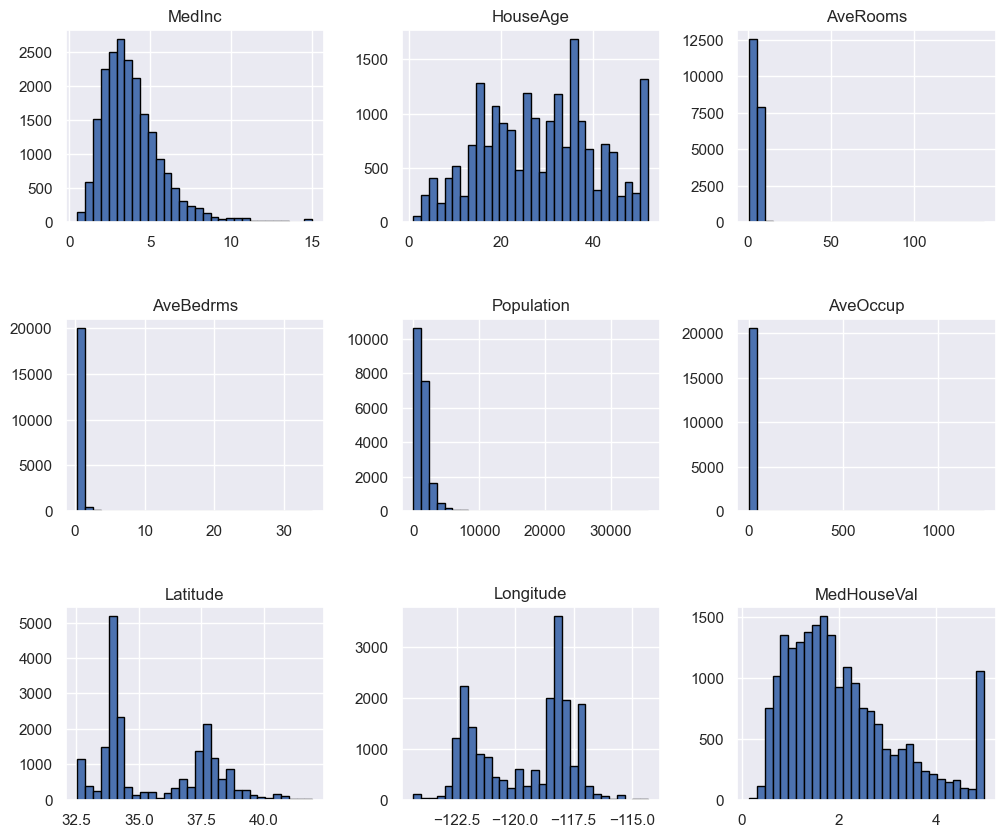

In [8]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.3)

From above plots, we can see that features show an irregular distribution. Thus, in order to simplify the analysis, we will consider `HoseAge` and `MedInc` features only.

### Selection of features and response data

In [9]:
x = np.array(california_housing.frame['HouseAge']).reshape(-1,1)

In [10]:
y = np.array(california_housing.target)

### Fitting the model

In [11]:
model1 = LinearRegression().fit(x, y)

### Getting the results

In [12]:
r_sq = model1.score(x, y)
print(f"Coefficient of determination: {r_sq:,.4f}")
print(f"Intercept: {model1.intercept_}")
print(f"Slope: {model1.coef_}")

Coefficient of determination: 0.0112
Intercept: 1.7911991658938475
Slope: [0.0096845]


### Predicting response

In [13]:
y_pred1 = model1.predict(x)
y_pred1

array([2.18826352, 1.99457359, 2.29479298, ..., 1.9558356 , 1.9655201 ,
       1.94615111])

We can see that $r^2$ value is low, so the model isn't so good at all.

Next, we shall add another feature, and present how to run a multiple or multivariate regression.

### Multiple linear regression

In [14]:
X = np.array(california_housing.frame[['MedInc','HouseAge']])

In [15]:
model2 = LinearRegression().fit(X,y)

In [16]:
r_sq = model2.score(X, y)
print(f"Coefficient of determination: {r_sq:,.4f}")
print(f"Intercept: {model2.intercept_:,.4f}")
print(f"Slope: {model2.coef_:}")

Coefficient of determination: 0.5091
Intercept: -0.1019
Slope: [0.43169191 0.01744134]


We can see that $R^2$ value for multivariate regression is better off than for simple regression.

Thus, we can determine this model is better suitable.

### Predicting response

In [17]:
y_pred2 = model2.predict(X)
y_pred2

array([4.20712626, 3.84802511, 3.93802043, ..., 0.92848877, 1.018109  ,
       1.20831047])

On the other hand, we will presente how to run a multivariate regression with `statsmodels` library. In short, `statsmodels` and `sckit-learn` libraries give the same results, but `statsmodels` gives more statistical information.

### Multiple Linear Regression with statsmodels

In [18]:
X = sm.add_constant(X)

In [19]:
model4 = sm.OLS(y, X)

In [20]:
results = model4.fit()

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                 1.070e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:46:23   Log-Likelihood:                -24899.
No. Observations:               20640   AIC:                         4.980e+04
Df Residuals:                   20637   BIC:                         4.983e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1019      0.019     -5.320      0.000      -0.139      -0.064
x1             0.4317      0.003    144.689      0.000       0.426       0.438
x2             0.0174      0.000     38.726      0.000       0.017       0.018
==============================================================================
Omnibus:                     4099.868   Durbin-Watson:                   0.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9707.077
Skew:                           1.118   Prob(JB):                         0.00
Kurtosis:                       5.507   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
print(f"Coefficient of determination: {results.rsquared:,.4f}")
print(f"Adjusted coefficient of determination: {results.rsquared_adj:,.4f}")
print(f"Regression coefficients: {results.params}")

Coefficient of determination: 0.5091
Adjusted coefficient of determination: 0.5091
Regression coefficients: [-0.10189033  0.43169191  0.01744134]


### Predicting response

In [23]:
print(f"Predicted response:\n{results.fittedvalues}")

print(f"Predicted response:\n{results.predict(X)}")

Predicted response:
[4.20712626 3.84802511 3.93802043 ... 0.92848877 1.018109   1.20831047]
Predicted response:
[4.20712626 3.84802511 3.93802043 ... 0.92848877 1.018109   1.20831047]


With the intention to explore briefly if nonlinear regression could be a better model, we shall briefly present how to run a polynomial regression.

### Polynomial Regression

In [24]:
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [25]:
model3 = LinearRegression().fit(X_, y)

In [26]:
r_sq = model3.score(X_, y)
print(f"Coefficient of determination: {r_sq:,.4f}")
print(f"Intercept: {model3.intercept_:,.4f}")
print(f"Slope: {model3.coef_:}")

Coefficient of determination: 0.0167
Intercept: 2.1304
Slope: [-0.01911318  0.00049618]


We can conclude that polynomial regression isn't a suitable model for our analysis. Instead, said multivariate regression model is best suited.

### Predicting response

In [27]:
y_pred = model3.predict(X_)
y_pred

array([2.18082538, 1.94781969, 2.47817755, ..., 1.9488523 , 1.94710559,
       1.95159138])

### Conclusion

You now know what linear regression is and how you can implement it with Python and three open-source packages: NumPy, scikit-learn, and statsmodels. You use NumPy for handling arrays. Linear regression is implemented with the following:

scikit-learn if you don’t need detailed results and want to use the approach consistent with other regression techniques
statsmodels if you need the advanced statistical parameters of a model
Both approaches are worth learning how to use and exploring further. The links in this article can be very useful for that.

In this tutorial, you’ve learned the following steps for performing linear regression in Python:

Import the packages and classes you need
Provide data to work with and eventually do appropriate transformations
Create a regression model and fit it with existing data
Check the results of model fitting to know whether the model is satisfactory
Apply the model for predictions
And with that, you’re good to go! If you have questions or comments, please put them in the comment section below.

### References

* Stojiljkovic, M. (2024) "Linear Regression in Python" on Real Python retrieved from https://realpython.com/linear-regression-in-python/
* SckitLearn Website (2024) "Machine Learning Concepts" on The California Housing Dataset retrieved from https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

## Contact

<!-- Avatar -->
<img src="../Pictures/profile2.png" alt="me" width="75" height="80">
<!-- Text with color, font, fontsize and specific size -->
<p style="color:#323232; font-family: Helevetica; font-size: 20px;">Jesus L. Monroy<br>Economist | Data Scientist</p>
<!-- Insert url links in logos -->
<!-- Resume -->
<a href="https://cutt.ly/jesus-lmonroy-resume" target="_blank" rel="noreferrer"> <img src="https://icongr.am/material/card-account-details-outline.svg?size=16&color=3b3b3b" alt="resume" width="28" height="28"/>
<!-- style="padding-left:8px" adds spaces before logo link -->
<!-- e-mail -->
<a href="mailto:7yt400aug@mozmail.com?subject=Information%20request%20" target="_blank" rel="noreferrer"> <img src="https://icongr.am/feather/mail.svg?size=16&color=3b3b3b" alt="email" width="30" height="30" style="padding-left:8px"/>
<!-- Telegram -->
<a href="https://t.me/j3suslm" target="_blank" rel="noreferrer"> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSC8DykewOCqmuAO4hAFQMEYkfL68oELRj0BQ&usqp=CAUsize=16&color=3b3b3b" alt="telegram" width="28" height="20" style="padding-left:8px"/>
<!-- Twitter -->
<a href="https://www.twitter.com/sqlalchemist" target="_blank" rel="noreferrer"> <img src="https://toppng.com/public/uploads/preview/twitter-x-new-logo-round-icon-png-11692480241tdbz6jparr.webp?size=16&color=3b3b3b" alt="twitter" width="30" height="22" style="padding-left:8px"/>
<!-- Github -->
<a href="https://github.com/SqlAlchemist/My-portfolio" target="_blank" rel="noreferrer"> <img src="https://icongr.am/devicon/github-original.svg?size=16&color=3b3b3b" alt="github" width="30" height="30" style="padding-left:8px"/>
<!-- Linkedin -->
<a href="https://www.linkedin.com/in/j3sus-lmonroy" target="_blank" rel="noreferrer"> <img src="https://icongr.am/simple/linkedin.svg?size=16&color=3b3b3b" alt="linkedin" width="30" height="30" style="padding-left:8px"/>
<!-- Medium -->
<a href="https://medium.com/@jesus_lmonroy" target="_blank" rel="noreferrer"> <img src="https://cdn1.iconfinder.com/data/icons/social-media-and-logos-12/32/Logo_medium-512.png?size=55&color=3b3b3b" alt="medium" width="30" height="33" style="padding-left:8px"/>